<h1 style="color: navy; text-align:center">Representação por ponto fixo</h1> 
<p style="text-align:center">delimita o número de casas decimais</p> 

<h1 style="color: navy; text-align:center">Representação por ponto flutuante</h1> 
<p style="text-align:center">delimita o número de algarismos significativos</p> 


<h1 style="color: navy; text-align:center">Erro</h1> 

 \begin{equation*}
a = ã + ε 
 \end{equation*}


 \begin{equation*}
 \sqrt{2} = 1,4142 + 0,0000135
 \end{equation*}


a = Valor verdadeiro da medida

ã = valor aproximado da medida

ε = Erro

<h1 style="color: navy; text-align:center">Erro relativo</h1> 

 \begin{equation*}
|εr| = \fracβã
 \end{equation*}

**εr = Erro relativo**

β = Limitante do Erro (erro maximo): parametro do metodo

ã = valor aproximado

---

<h1 style="color: purple; text-align:center">Métodos iterativos para encontrar a raiz de um polinômio</h1> 

<h2 style="color: purple; text-align:center">Método da Bisseção</h2> 

<img src="bisection.gif">

Execução: dividir um intervalo (a , b) em que a raiz se encontra pela metade, encontrando um ponto (c, f(c)). Decidir entre os dois intervalos resultantes: (a , c) ou (c , b) aquele em que a função muda de sinal, pois é ali onde ha uma raiz. Dividir novamente…

Informações:
- f é contínua
- (a , b) com $f(a)*f(b)$ < 0, ou seja, a função troca de sinal, portanto há uma raiz no intervalo (a, b)
- $β_{max}$: erro máximo tolerado ou precisão mínima requerida (critério de parada) ou tamanho do intervalo.
- Teorema do Valor Intermediário: é condição suficiente para o método
- Redução linear do erro: A cada subdivisão do intervalo, ou a cada interação do código, o erro cai pela metade

\begin{gather*}
\varepsilon_{n+1} = \frac{b - a}{2} \\
\varepsilon_{n+1} = \frac{\varepsilon_{n}}{2}
\end{gather*}

Exemplo: encontrar a raiz positiva do polinômio  $y = x^2-2$ $(√2)$ 

In [34]:
inf = 1
sup = 2
med = 0
prec = 0.000001
finf = 0
fsup = 0
fmed = 0;
qntloops = 0
	
while((sup - inf) > prec):

    med = (sup + inf) / 2
    fmed = pow(med, 2) - 2
    finf = pow(inf, 2) - 2
    fsup = pow(sup, 2) - 2
    
    if(finf*fmed < 0):

        sup = med

    elif(fmed == 0):

        break

    else:

        inf = med
        
    qntloops += 1

print("Raiz de 2: ", med)
print("Quantidade de loops executados: ", qntloops)

Raiz de 2:  1.4142141342163086
Quantidade de loops executados:  20


---

<h2 style="color: purple; text-align:center">Método da falsa posição</h2> 

<div style="margin: 0 auto;">
    <img src="RegulaFalsi.gif">
</div>

Premissa: reta é uma aproximação melhor da função (?) 

Execução: Escolhemos um intervalo (a , b) em que a raiz de encontra, traçamos uma reta do ponto f(a) até o ponto f(b). A raiz dessa reta sera o ponto c (a falsa posição da raiz). Se f(c) * f(a) < 0, o novo extremo b deve ser c. Do contrario, o novo extremo a deve ser c. Faz-se o mesmo procedimento para o novo intervalo.

Fazemos o desenvolvimento do sistema de equações de reta a seguir:

\begin{cases}
f(a) & = & αa & + & β\\f(b) & = & αb & + & β\\f(c) & = & 0 & = & αc & + & β 
\end{cases}

- A primeira é a equação da reta aplicada no ponto a
- A segunda é a equação da reta aplicada no ponto b
- A terceira é a equação da reta aplicada no ponto c que é a raiz da funçao, ou seja f(c) = 0
- α é o coeficiente angular e β o linear
- Como resultado do sistema temos:

\begin{equation*}
c  = \frac{f(a)b - f(b)a}{f(a)-f(b)}
\end{equation*}

- Onde o ponto c (falsa posição) é dado em função de a, b, f(a) e f(b)
  
O critério de parada é um erro máximo β associado não ao intervalo (a , b), mas ao quão próximo f(c) esta de 0, ou seja, o quão próximo está de ser uma raiz.
- $|f(c)|< β$


Cada subdivisão do intervalo, β diminui em…

Exemplo: encontrar a raiz positiva do polinômio  $y = x^2-2$ $(√2)$

In [35]:
a = 1
b = 2
c = 0
fa = 0
fb = 0
fc = 1
B = 0.000001
qntloops = 0

while(abs(fc) > B):

    fa = pow(a, 2) - 2;
    fb = pow(b, 2) - 2;

    c = (fa*b - fb*a) / (fa - fb);
    fc = pow(c, 2) - 2;

    if(fc*fa < 0):

        b = c

    elif(fc == 0):

        break

    else:

        a = c
        
    qntloops += 1
    
print("Valor da raiz de 2: ", c);
print("Quantidade de loops executados: ", qntloops)

Valor da raiz de 2:  1.4142134998513232
Quantidade de loops executados:  9


---

<h2 style="color: purple;text-align:center;" >Método de Newton</h2>

<img src="newton.gif">

Execução: Arbitramos um ponto $x_0$ bem próximo à raiz do polinômio. Calculamos a reta y tangente a $f(x_0)$, ou seja, a reta y cujo coeficiente angular seja a derivada $f’(x_0)$. Calculamos o ponto onde a reta intercepta o eixo x, ou seja, o ponto $x_1$ em que $y(x_1) = 0$. Calculamos $f(x_1)$ e logo depois a reta tangente a f(x1)…

Para acharmos o próximo ponto possível para raiz: $x_{i+1}$ em função do ponto $x_i$, efetuamos o seguinte desenvolvimento:

\begin{gather*}
y(x) = αx + β\\ 
y(x_0) = f(x_0) = f'(x_0)x_0 + β 
\\ β = f(x_0) -f'(x_0)x_0
\\ mas, y(x_1) = 0 
\\ y(x_1) = 0 = f'(x_0)x_1 +  f(x_0) -f'(x_0)x_0
\\ x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} 
\end{gather*}

Podemos generalizar (6) para:

\begin{equation*} x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} \end{equation*}

Obs.: ($f'(x_{i})$) não pode ser 0 para o método funcionar. A derivada zero indicaria uma mudança de comportamento da função nas proximidades da raiz, fazendo-se necessário refinar mais o valor de $x_{0}$ (achar uma mais próximo da raiz) com outros métodos como o da bisseção.

Informações:
- a função f deve ser diferenciável
- β é a tolerância de erro, geralmente $10^{-k}$ com k dado pela função (critério de parada)
- Nmax é o número máximo de iterações geralmente dado por 2k (critério de parada)
— Erro β analisado na Série de Taylor

Exemplo: encontrar a raiz positiva do polinômio  $y = x^2-2$ $(√2)$

In [36]:
x = 1.5;
fx = 0;
derx = 0; 
B = 0.0001;
i = 0

while(i < 100):
    fx = pow(x, 2) - 2
    derx = 2*x
    x = x - fx/derx
    i += 1;

    if(fx < 0.0001): 
        break

print("Raiz de 2 é: ", x);
print("Quantidade de loops foi: ", i)

Raiz de 2 é:  1.4142135623746899
Quantidade de loops foi:  3


---

<h1 style="color: green; text-align:center">Série de Taylor</h1> 

Objetivo: aproximar uma função conhecida e diferenciável para um polinômio de grau “n”

\begin{equation*}
Pn(x) = a_0 + a_1x + a_2x^2 + a_3x^3 + ... + a_nx^n
\end{equation*}

Propriedades convenientes de polinômios:

- Contínuos e Diferenciáveis
- Fáceis de operar

Para achar os valores dos coeficientes:

\begin{gather*}
f(x) = a_0 + a_1x + a_2x^2 + a_3x^3 ...\\
x = 0 \rightarrow f(0) = a_0\\
f'(x) = a_1 + 2a_2x + 3a_3x^2\\
x = 0 \rightarrow f'(0) = a_1 \rightarrow a_1 = \frac {f'(0)}{1!}\\
f''(x) = 2\cdot1a_2 + 3\cdot2a_3x ... \\
x = 0 \rightarrow f''(0) = 2\cdot1a_2 \rightarrow a_2 = \frac {f''(0)}{2!}\\
\end{gather*}

A formula geral dos coeficientes é:

\begin{equation*}
a_n = \frac {f^{[n]}(0)}{n!}
\end{equation*}

Quando ha deslocamento "s" em relaçao a x no polinomio:

\begin{equation*}
a_n = \frac {f^{[n]}(s)}{n!}
\end{equation*}

- "s" é chamado de centro de série

\begin{equation*}
f(x-s) = a_0 + a_1(x-s) + a_2(x-s)^2 + a_3(x-s)^3 
\end{equation*}

Podemos utilizar a série de Taylor para aproximar uma função conhecida a um polinômio de “n” termos. 

Exemplo: Aproximar $sen(x)$ a um $Pn(x)$ de 3 termos em torno do ponto $x = \pi / 2$

\begin{gather*}
s = \frac{\pi}{2}\\
sen(x) = Pn(x) \\
a_0 = Pn(s) = sen(\frac{\pi}{2}) = 1\\
[sen(x)]' = [Pn(x)]'\\
a_1 = \frac{Pn'(s)}{1!} = \frac{sen'(\frac{\pi}{2})}{1!} = \frac{cos(\frac{\pi}{2})}{1!} = 0\\
[sen(x)]'' = [Pn(x)]''\\
a_2 = \frac{Pn''(s)}{2!} = \frac{sen''(\frac{\pi}{2})}{2!} = \frac{-sen(\frac{\pi}{2})}{2!} = -\frac{1}{2}\\
\end{gather*}

Encontramos $a_0$, $a_1$ e $a_2$, temos então o polinômio:

\begin{equation*}Pn(x) = 1 -\frac{1}{2}(x - \frac{\pi}{2})^2\end{equation*}


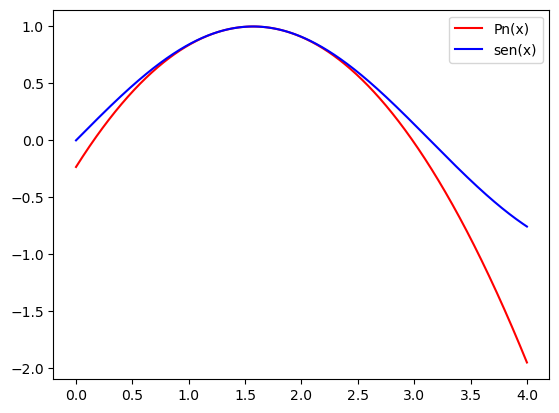

In [37]:
from matplotlib import pyplot as plt
import numpy as np
import math

def f(x):
    return 1 - ((x - math.pi/2)**2)/2

def h(x):
    return np.sin(x)

x = np.linspace(0, 4, 1000)
y = f(x)
z = h(x)

plt.plot(x, y, color='r', label='Pn(x)')
plt.plot(x, z, color='b', label='sen(x)')
plt.legend()

plt.show()

Percebe-se pelo gráfico que $Pn(x)$ diverge cada vez mais de $sen(x)$ a medida em que se afasta do ponto $s = \pi/2$

Assim, considerando os pontos suficientemente próximos de s, ou seja, pontos cuja distância $|x - s|$ seja muito pequena, o polinômio encontrado é uma otina aproximação. Para pontos mais distantes de s, o polinômio deve ter mais termos.

-1.22464679914735e-16*x - 4.05871212641677*(0.318309886183791*x - 1)**4 + 6.32862291500106e-16*(0.318309886183791*x - 1)**3 + 4.93480220054468*(0.318309886183791*x - 1)**2 - 1.0


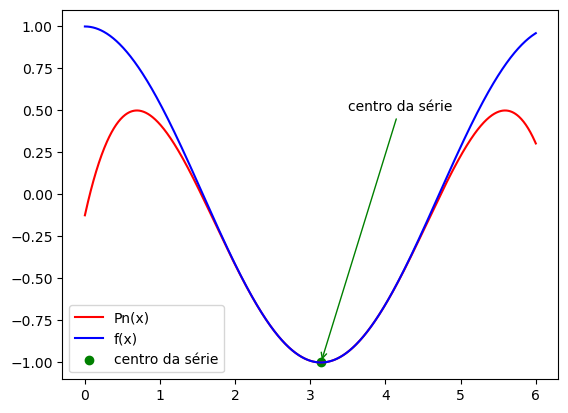

In [38]:
from matplotlib import pyplot as plt
import sympy as sp
from sympy import sin, exp, cos, lambdify, factorial
from sympy.abc import x
import numpy as np
import math

#centro de série
s = math.pi

#numero de termos desejados
n = 5

#funçao
def f(x): 
    return cos(x)

res = 0;
fun = f(x);

#encontrar polinomio de taylor
for i in range(n):
    res += fun.evalf(subs={x: s}) * (x - s)**i / math.factorial(i)
    fun = sp.diff(fun,x)
print(res)

#convertendo objetos sympy para numpy
pol = lambdify(x, res, modules=['numpy'])
function = lambdify(x, f(x), modules=['numpy'])

#limites dos eixos x e y
x_axis = np.linspace(0, 6, 1000)
y = pol(x_axis)
z = function(x_axis)
ponto_enfatizado = (s, f(s))

#imprimindo grafico
plt.plot(x_axis, y, color='r', label='Pn(x)')
plt.plot(x_axis, z, color='b', label='f(x)')
plt.scatter(*ponto_enfatizado, color='green', label='centro da série')
plt.annotate('centro da série', xy=ponto_enfatizado, xytext=(3.5, 0.5),
             arrowprops=dict(arrowstyle='->', color='green'))

plt.legend()

plt.show()

---

<h2 style="color: green; text-align:center">Análise do Erro relacionado ao método de Newton</h2> 

Podemos considerar $x_{n+1}$ como $g(x_n)$ (que pende de $f(x_n)$ e $f'(x_n)$:

\begin{equation*} x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} = g(x_n)\end{equation*}

Considerando a raiz de $f(x)$ como s, do próprio método temos que $x_n$ tende a s:

\begin{gather*} 
f(s) = 0 \\
\lim_{n\rightarrow \infty} x_n = s
\end{gather*}

Aplicando a fórmula de coeficientes do método de Taylor à função $g(x_n)$ encontramos os seguintes valores para os coeficientes do polinômio que melhor a aproxima:

\begin{gather*} 
a_0 = g(s) = s - \frac{f(s)}{f'(s)} = s \\
a_1 = g'(s) = 0 \\
a_2 = \frac{g''(s)}{2} = \frac{f''(s)}{2f(s)} \\
a_3 = ...
\end{gather*}

\begin{gather*} 
g(x_n) = x_{n + 1} = s + \frac{f''(s)}{2f(s)}(x_n - s)^2 + a3(x_n - s)^3 + ...\\
x_{n + 1} - s = \frac{f''(s)}{2f(s)}(x_n - s)^2 + a3(x_n - s)^3 + ...
\end{gather*}

- $x_{n+1} - s$ é a distância entre a aproximação para a raiz e a raiz em si
- $x_n$ é a aproximação anterior

Erro da aproximação anterior: $\varepsilon_n = x_n - s$

Erro da próxima aproximação: $\varepsilon_{n + 1} = x_{n + 1} - s$

Substituindo os erros no polinômio encontrado:

\begin{equation*}
\varepsilon_{n + 1} = \frac{f''(s)}{2f(s)}\varepsilon_n^2 + O(\varepsilon_n^3) ...
\end{equation*}

Percebe-se que o método de Taylor é de ordem quadrática.

$O(\varepsilon_n^3)$ são os termos de ordem $(\varepsilon_n^3)$ ou mais. Para tais termos, o erro é maior, pois a distância entre os valores experimentais e o real ($x_n - s$) aumenta.

---

<h1 style="color: blue; text-align:center">Interpolação</h1> 

Objetivo: Encontrar polinômio de grau “n” a partir de dados tabelados

\begin{equation*}
Pn(x) = a_0 + a_1x + a_2x^2 + a_3x^3 + ... + a_nx^n
\end{equation*}

<table style="border: 1px solid black; text-align: center;">
    <tr style="border: 1px solid black;">
        <th style="border: 1px solid black;">$x_i$</th>
        <th style="border: 1px solid black;">$f(x_i) = y_i$</th>
        <th style="border: 1px solid black;">$P_n(x_i)$</th>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">$x_0$</td>
        <td style="border: 1px solid black;">$y_0$</td>
        <td style="border: 1px solid black;">$P_n(x_0) = y_0$</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">$x_1$</td>
        <td style="border: 1px solid black;">$y_1$</td>
        <td style="border: 1px solid black;">$P_n(x_1) = y_1$</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">$x_2$</td>
        <td style="border: 1px solid black;">$y_2$</td>
        <td style="border: 1px solid black;">$P_n(x_2) = y_2$</td>
    </tr>
</table>

Interpolar: encontrar os pontos faltantes entre $x_1$ e $x_3$, ou seja, encontrar $P_n(x) \forall x \in (x_1, x_3)$

Dado um conjunto de (n + 1) pontos, qual polinômio interpolante de menor grau obtemos? 

<p style="color: blue;"> a) n = 0 -> um único ponto </p>

<table style="border: 1px solid black; text-align: center;">
    <tr style="border: 1px solid black;">
        <th style="border: 1px solid black;">$x_i$</th>
        <th style="border: 1px solid black;">$f(x_i) = y_i$</th>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">$x_0$</td>
        <td style="border: 1px solid black;">$y_0$</td>
    </tr>
</table>

Função constante: $Pn_0(x) = y_0$

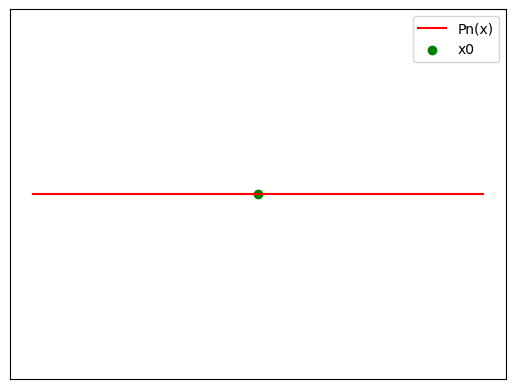

In [39]:
from matplotlib import pyplot as plt
import numpy as np
import math

def f(x):
    return 1 * x**0

x = np.linspace(0, 4, 1000)
y = f(x)
ponto_enfatizado = (2, f(2))

plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.plot(x, y, color='r', label='Pn(x)')
plt.scatter(*ponto_enfatizado, color='green', label='x0')
plt.legend()

plt.show()

---

<p style="color: blue;"> a) n = 1 -> dois pontos </p>

<table style="border: 1px solid black; text-align: center;">
    <tr style="border: 1px solid black;">
        <th style="border: 1px solid black;">$x_i$</th>
        <th style="border: 1px solid black;">$f(x_i) = y_i$</th>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">$x_0$</td>
        <td style="border: 1px solid black;">$y_0$</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">$x_1$</td>
        <td style="border: 1px solid black;">$y_1$</td>
    </tr>
</table>

Função linear: $Pn_1(x) = a_0 + a_1x$

Para encontrar os coeficientes, resolvemos o sistema linear:

\begin{cases}
 a_0 + a_1x_0 = y_0\\
 a_0 + a_1x_1 = y_1\\
\end{cases}

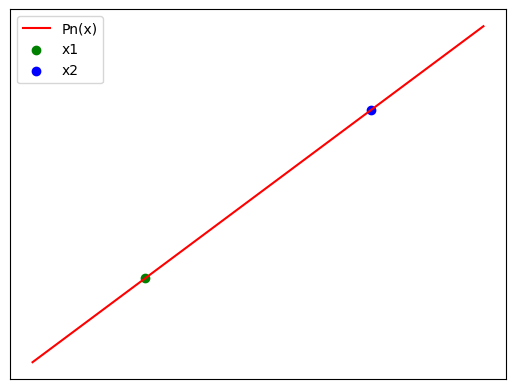

In [40]:
from matplotlib import pyplot as plt
import numpy as np
import math

def f(x):
    return 1 + x

x = np.linspace(0, 4, 1000)
y = f(x)
ponto_1 = (1, f(1))
ponto_2 = (3, f(3))

plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.plot(x, y, color='r', label='Pn(x)')
plt.scatter(*ponto_1, color='green', label='x1')
plt.scatter(*ponto_2, color='blue', label='x2')

plt.legend()

plt.show()

---

<p style="color: blue;"> a) n = 2 -> três pontos </p>

<table style="border: 1px solid black; text-align: center;">
    <tr style="border: 1px solid black;">
        <th style="border: 1px solid black;">$x_i$</th>
        <th style="border: 1px solid black;">$f(x_i) = y_i$</th>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">$0$</td>
        <td style="border: 1px solid black;">-$2$</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">$1$</td>
        <td style="border: 1px solid black;">$-1$</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">$2$</td>
        <td style="border: 1px solid black;">$2$</td>
    </tr>
</table>

Função quadrática: $Pn_2(x) = a_0 + a_1x + a_2x^2$

Para encontrar os coeficientes, resolvemos o sistema linear:

\begin{cases}
 Pn_2(0) = -2 = a_0 + 0a_1 + (0)^2a_2\\
 Pn_2(0) = -1 = a_0 + 1a_1 + (1)^2a_2\\
 Pn_2(0) = -2 = a_0 + 2a_1 + (2)^2a_2\\
\end{cases}

Percebe-se que as equações são linearmente independentes, ou seja, existe um único polinômio que passa pelos três pontos dados. Resolvendo o sistema, o polinômio é:
$Pn_2(x) = x^2 - 2$

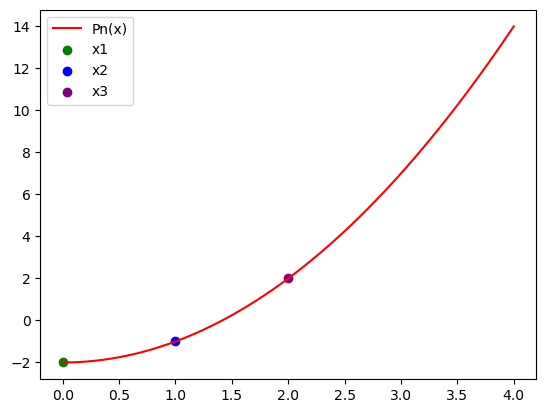

In [41]:
from matplotlib import pyplot as plt
import numpy as np
import math

def f(x):
    return x**2 -2

x = np.linspace(0, 4, 1000)
y = f(x)
ponto_1 = (0, f(0))
ponto_2 = (1, f(1))
ponto_3 = (2, f(2))

plt.plot(x, y, color='r', label='Pn(x)')
plt.scatter(*ponto_1, color='green', label='x1')
plt.scatter(*ponto_2, color='blue', label='x2')
plt.scatter(*ponto_3, color='purple', label='x3')
plt.legend()

plt.show()

---

<h2 style="color: blue; text-align:center">Polinômios de Lagrange</h2>

Para encontrar polinômios de maior grau, a resolução de sistemas lineares se torna muito complexa. O método de Lagrange apresenta uma resolução mais rápida para esse problema:

<table style="border: 1px solid black; text-align: center;">
    <tr style="border: 1px solid black;">
        <th style="border: 1px solid black;">$x_i$</th>
        <th style="border: 1px solid black;">$f(x_i)$</th>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">$x_0$</td>
        <td style="border: 1px solid black;">$f(x_0)$</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">$x_1$</td>
        <td style="border: 1px solid black;">$f(x_1)$</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;">$x_2$</td>
        <td style="border: 1px solid black;">$f(x_2)$</td>
    </tr>
</table>

\begin{equation*} Pn_2(x) = l_0(x)f(x_0) + l_1(x)f(x_1) + l_2(x)f(x_2) \end{equation*}

Onde:

\begin{equation*}
l_i(x) =
\begin{cases}
 1, & se & x = x_i \\
 0, & se & x = x_j, (j \neq i)
\end{cases}
\end{equation*}

O que garante a interpolação da seguinte forma:

\begin{gather*}
Pn_2(x_0) =  f(x_0)\\
Pn_2(x_1) =  f(x_1)\\
Pn_2(x_2) =  f(x_2)
\end{gather*}

$l_i(x)$ é configurado da seguinte forma para garantir os valores 0 ou 1:

<table style="border: 1px solid black; text-align: center;">
    <tr style="border: 1px solid black;">
        <td>
            \begin{equation*}
            l_0(x) = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)}
            \end{equation*}
        </td>
        <td>
             \begin{gather*}
            l_0(x_0) = 1\\
            l_0(x_1) = 0\\
            l_0(x_2) = 0\\
            \end{gather*}
        </td>
    </tr>
    <tr style="border: 1px solid black;">
        <td>
            \begin{equation*}
            l_1(x) = \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)}
            \end{equation*}
        </td>
        <td>
             \begin{gather*}
            l_1(x_0) = 0\\
            l_1(x_1) = 1\\
            l_1(x_2) = 0\\
            \end{gather*}
        </td>
    </tr>
    <tr style="border: 1px solid black;">
        <td>
            \begin{equation*}
            l_2(x) = \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)}
            \end{equation*}
        </td>
        <td>
             \begin{gather*}
            l_2(x_0) = 0\\
            l_2(x_1) = 0\\
            l_2(x_2) = 1\\
            \end{gather*}
        </td>
    </tr>
</table>

\begin{equation}
l_k(x)= \prod_{i=0, i \neq k}^{n} \frac{(x - x_i)}{(x_k - x_i)}
\end{equation}

Exemplo com entrada: (-1,7), (0,1), (1,-1), (1,-17)

Digite o valor de x (ou qualquer outra entrada para parar):  -1
Digite o valor de y (ou qualquer outra entrada para parar):  7
Digite o valor de x (ou qualquer outra entrada para parar):  0
Digite o valor de y (ou qualquer outra entrada para parar):  1
Digite o valor de x (ou qualquer outra entrada para parar):  1
Digite o valor de y (ou qualquer outra entrada para parar):  -1
Digite o valor de x (ou qualquer outra entrada para parar):  2
Digite o valor de y (ou qualquer outra entrada para parar):  -17
Digite o valor de x (ou qualquer outra entrada para parar):  p


-3.0*x**3 + 2.0*x**2 - 1.0*x + 1.0


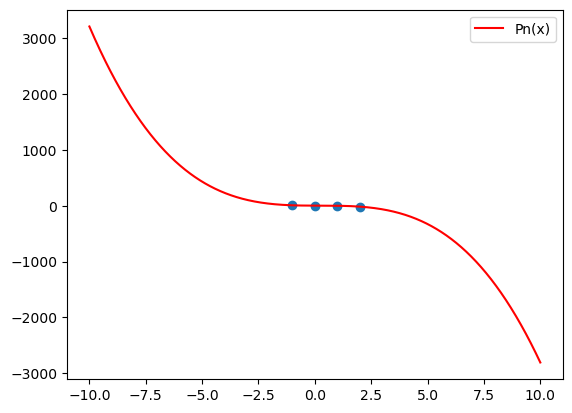

In [58]:
from matplotlib import pyplot as plt
import sympy as sp
from sympy import sin, exp, cos, lambdify, factorial
from sympy.abc import x
import numpy as np
import math

# Listas para armazenar os pontos x e y
pontos_x = []
pontos_y = []

# Solicitar ao usuário que insira os valores x e y até que deseje parar
while True:
    try:
        nx = float(input("Digite o valor de x (ou qualquer outra entrada para parar): "))
        ny = float(input("Digite o valor de y (ou qualquer outra entrada para parar): "))
        
        pontos_x.append(nx)
        pontos_y.append(ny)
        
    except ValueError:
        # O usuário digitou algo que não é um número, encerramos a coleta
        break

# Verificar se há pontos coletados
if len(pontos_x) > 0:

    #polinomio
    p = 0
    #base de lagrange 
    l = 1
    
    for k, y in zip(pontos_x, pontos_y):
        
        for i in pontos_x:
            if(i != k):
                l *= (x - i)/(k - i)
        p += l*y
        l = 1
        
    p = sp.simplify(p)

    #imprimindo polinomio
    print(p)
    
    #convertendo objetos sympy para numpy
    p = lambdify(x, p, modules=['numpy'])
    
    #limites dos eixos x e y
    x_axis = np.linspace(-10, 10, 1000)
    y = p(x_axis)

    #grafico de dispersao dos pontos inseridos
    plt.scatter(pontos_x, pontos_y)
    
    #imprimindo grafico
    plt.plot(x_axis, y, color='r', label='Pn(x)')
    
    plt.legend()
    
    plt.show()
    
else:
    print("Nenhum ponto foi coletado.")
